In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Paper Xu ly anh y khoa/"

/content/drive/MyDrive/Paper Xu ly anh y khoa


### **Phase 1:** `normal` **and** `positive` **classification**
Mục đích của việc phân loại `normal` và `positive`:
* Kiểm tra độ phủ (recall) và độ chính xác (precision).

> **Recall**: trong những người thực sự có bệnh, bao nhiêu trong số họ được dự đoán đúng bởi mô hình ? \
**Precision**: là tỷ lệ giữa những người thật sự có bệnh so với tất cả những người được dự đoán là có bệnh.

* Bài toán binary classification







In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os

from keras.layers import Dense, Flatten
from keras.models import Model
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications import MobileNetV3Large
from keras.applications import Xception

from tensorflow.keras.optimizers import Adam

Read images using `ImageDataGenerator`

In [4]:
# Defining the parameters
IMG_CHANEL = 3
COLOR_MODE = 'rgb'
CLASS_NAME = ['normal', 'positive']
IMAGESHAPE = [224, 224, 3]

In [5]:
# Function to feed data set into the model
from keras.preprocessing.image import ImageDataGenerator

## For training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [6]:
# Setting folder path
train_data = 'data/train/'
val_data = 'data/val/'
test_data = 'data/test/'

In [7]:
train_set = train_datagen.flow_from_directory(train_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 17369 images belonging to 2 classes.


In [8]:
val_set = testing_datagen.flow_from_directory(val_data,
                                              target_size = (224, 224),
                                              batch_size = 64,
                                              shuffle = True,
                                              color_mode = "rgb",
                                              class_mode = 'categorical')

Found 1931 images belonging to 2 classes.


Build model

In [9]:
xception_model = Xception(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [10]:
for each_layer in xception_model.layers:
		each_layer.trainable = False

In [11]:
# Flatten output
flatten_layer = Flatten()(xception_model.output)
prediction = Dense(len(CLASS_NAME), activation='softmax')(flatten_layer)

In [12]:
final_model = Model(inputs=xception_model.input, outputs=prediction)
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [13]:
# Compile model
final_model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
)

In [ ]:
# Train model
fitted_model = final_model.fit_generator(generator = train_set,
                                         validation_data = val_set,
                                         epochs=10,
                                         steps_per_epoch=len(train_set),
                                         validation_steps=len(val_set)
                                        )

<ipython-input-14-6c19f3e4afa6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model = final_model.fit_generator(generator = train_set,


Epoch 1/10
272/272 [==============================] - 5298s 19s/step - loss: 1.3005 - accuracy: 0.7303 - val_loss: 1.1726 - val_accuracy: 0.7452
Epoch 2/10
272/272 [==============================] - 4809s 18s/step - loss: 0.8773 - accuracy: 0.7701 - val_loss: 0.9746 - val_accuracy: 0.7338
Epoch 3/10
267/272 [============================>.] - ETA: 1:18 - loss: 1.0877 - accuracy: 0.7698

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-6c19f3e4afa6>", line 2, in <cell line: 2>
    fitted_model = final_model.fit_generator(generator = train_set,
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2636, in fit_generator
    return self.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 52, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.UnknownError: Graph execution error:

OSError: [Errno 107] Transport endpoint is not connected: 'data/train/positive/person1475_virus_2558..jpg'
Traceback (most r

In [ ]:
# Save model
final_model.save('saved_model/xception_normal_positive_size224.h5')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-7bd7f3a8ca26>", line 2, in <cell line: 2>
    final_model.save('saved_model/xception_normal_positive_size224.h5')
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 513, in recursive_create_dir_v2
    _pywrap_file_io.RecursivelyCreateDir(compat.path_to_bytes(path))
tensorflow.python.framework.errors_impl.FailedPreconditionError: saved_model; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-7bd7f3a8ca26>", line 2, in <cell line: 2>
    final_model.save('saved_model/xception_normal_positive_size224.h5')
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 513, in recursive_create_dir_v2
    _pywrap_file_io.RecursivelyCreateDir(compat.path_to_bytes(path))
tensorflow.python.framework.errors_impl.FailedPreconditionError: saved_model; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in 

#### Load saved model and predict on test set

In [ ]:
test_data = 'data/test/'

from keras.preprocessing.image import ImageDataGenerator
## For validation set and testing set
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [ ]:
test_set = testing_datagen.flow_from_directory(test_data,
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               shuffle = False,
                                               color_mode = "rgb",
                                               class_mode = 'categorical')

In [ ]:
from keras.models import load_model
# Load model
model=load_model('/content/drive/MyDrive/Paper Xu ly anh y khoa/saved_model/xception_normal_positive_size224.h5')
prediction=model.predict(test_set)

In [ ]:
# Convert y_pred to binary
y_pred = []
for i in range(0,len(prediction)):
    if prediction[i][0]>prediction[i][1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
print(y_pred)

In [ ]:
# Convert y_true to list
y_true = test_set.classes.tolist()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
report = classification_report(y_true, y_pred, digits=4, output_dict=True)
print(classification_report(y_true, y_pred, digits=4))

In [ ]:
# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Save the DataFrame to a CSV file
df.to_csv('report_xception_normal_positive_size224.csv', index=True)

In [ ]:
print(confusion_matrix(y_true, y_pred))

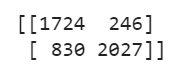

In [ ]:
plot.plot(model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
# plot.savefig('LossVal_loss')
plot.plot(model.history['accuracy'], label='training accuracy')
plot.plot(model.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()
# plot.savefig('AccVal_acc')

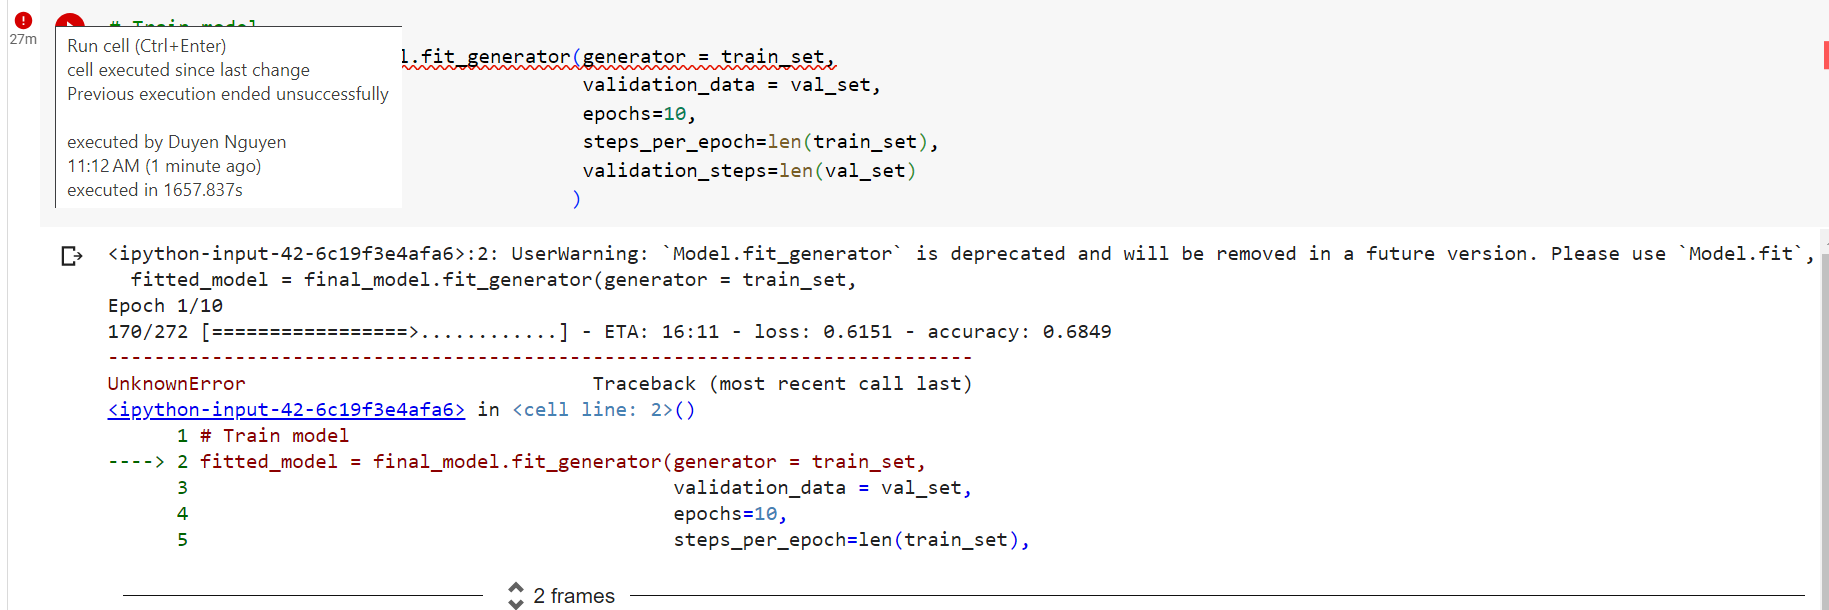

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras import backend as K

from keras.models import load_model

import utils

In [ ]:
labels = ['EFFUSION',
          'MASS',
          'PNEUMONIA',
          'TURBERCULOSIS'
          ]

In [ ]:
image_generator = ImageDataGenerator(samplewise_center=True,
                                     samplewise_std_normalization= True)

In [ ]:
%cd "/content/drive/MyDrive/Paper Xu ly anh y khoa"

/content/drive/MyDrive/Paper Xu ly anh y khoa


In [ ]:
# Chia train - test
import os
import random
import shutil

# Set the path to the original image folder
original_folder = './train_positive/TUBERCULOSIS'

# Set the path to the destination folders for train and test data
train_folder = './train_positive-/TUBERCULOSIS'
test_folder = './val_positive/TUBERCULOSIS'

# Set the ratio of images to be allocated for the train set
train_ratio = 0.9

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of images in the original folder
image_files = os.listdir(original_folder)

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the split index based on the train ratio
split_index = int(len(image_files) * train_ratio)

# Iterate through the image files and move them to the appropriate folders
for i, image_file in enumerate(image_files):
    source_path = os.path.join(original_folder, image_file)
    if i < split_index:
        destination_folder = train_folder
    else:
        destination_folder = test_folder
    destination_path = os.path.join(destination_folder, image_file)
    shutil.move(source_path, destination_path)

print("Images separated into train and test folders.")

Images separated into train and test folders.


In [ ]:
IMG_CHANEL = 3
COLOR_MODE = 'rgb'
CLASS_NAME = ['normal', 'positive']
IMAGESHAPE = [224, 224, 3]

In [ ]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    './data/train',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = CLASS_NAME,
    color_mode = 'rgb',
    batch_size = 256,
    image_size = (224,224),
    # validation_split=0.2,
    # subset='training',
    seed=42,
    interpolation = 'bilinear',
)

Found 17371 files belonging to 2 classes.


In [ ]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    './data',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = CLASS_NAME,
    color_mode = 'rgb',
    batch_size = 256,
    image_size = (224,224),
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    interpolation = 'bilinear',
)

Found 24129 files belonging to 2 classes.
Using 4825 files for validation.


In [ ]:
inception_v3_model = InceptionV3(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for each_layer in inception_v3_model.layers:
		each_layer.trainable = False

In [ ]:
# Flatten output
flatten_layer = Flatten()(inception_v3_model.output)
prediction = Dense(len(CLASS_NAME), activation='softmax')(flatten_layer)

In [ ]:
final_model = Model(inputs=inception_v3_model.input, outputs=prediction)
final_model.summary()

In [ ]:
# Compile model
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
training_data = 'data/train'
validation_data = 'data/val'
testing_data = 'data/test'

In [ ]:
training_set = train_datagen.flow_from_directory(training_data,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 17371 images belonging to 2 classes.


In [ ]:
test_set = testing_datagen.flow_from_directory(testing_data,
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               class_mode = 'binary')

Found 4827 images belonging to 2 classes.


In [ ]:
val_set = testing_datagen.flow_from_directory(validation_data,
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               class_mode = 'binary')

Found 1931 images belonging to 2 classes.


In [ ]:
# Train model
fitted_model = final_model.fit_generator(
      train_set,
      validation_data=val_set,
      epochs=10,
      steps_per_epoch=len(train_set),
      validation_steps=len(val_set)
)